In [1]:
!nvidia-smi

Sat Feb 13 02:14:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 39kB/s 


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_datasets'

In [7]:
%cd /content/gdrive/MyDrive/kaggle_datasets

/content/gdrive/MyDrive/kaggle_datasets


In [8]:
!ls

cat-and-dog
checkpoint
colab_fruits.h5
colab_fruits_weights.data-00000-of-00001
colab_fruits_weights.index
fruits-fresh-and-rotten-for-classification
kaggle.json
messy-vs-clean-room


In [9]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 674M/675M [00:09<00:00, 71.3MB/s]
100% 675M/675M [00:09<00:00, 77.0MB/s]


In [10]:
!mkdir model-for-detecting-malaria
!mv cell-images-for-detecting-malaria.zip model-for-detecting-malaria

In [11]:
%cd model-for-detecting-malaria

/content/gdrive/My Drive/kaggle_datasets/model-for-detecting-malaria


In [12]:
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Pre Trained Convolutional Base :

In [13]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [48]:
conv_base = InceptionResNetV2(include_top=False, input_shape=(150,150,3))

In [49]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_218 (Conv2D)             (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_217 (BatchN (None, 74, 74, 32)   96          conv2d_218[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 74, 74, 32)   0           batch_normalization_217[0][0]    
________________________________________________________________________________

In [50]:
for layer in conv_base.layers:
  layer.trainable = False

In [51]:
train_dir = '/content/gdrive/MyDrive/kaggle_datasets/model-for-detecting-malaria/cell_images/cell_images'
val_dir = '/content/gdrive/MyDrive/kaggle_datasets/model-for-detecting-malaria/cell_images/cell_images'

In [52]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.3)

val_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(val_dir,
                                                        target_size=(150,150),
                                                        batch_size=16,
                                                        class_mode='binary',
                                                        subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [24]:
# model = models.Sequential([
#                            conv_base,
#                            layers.Flatten(),
#                            layers.Dropout((0.5)),
#                            layers.Dense(512, activation='relu'),
#                            layers.BatchNormalization(),
#                            layers.Dense(256, activation='relu'),
#                            layers.Dense(1, activation='sigmoid')
# ])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13824)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               7078400   
_________________________________________________________________
batch_normalization_204 (Bat (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [55]:
model = models.Sequential([
                           layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D((2,2)),
                           layers.Dropout((0.4)),


                           layers.Conv2D(32, (3,3), activation='relu'),
                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D((2,2)),
                           layers.Dropout((0.4)),

                           layers.Conv2D(64, (3,3), activation='relu'),
                           layers.Conv2D(128, (3,3), activation='relu'),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D((2,2)),
                           layers.Dropout((0.4)),

                           layers.Flatten(),

                           layers.Dense(256, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dense(512, activation='relu'),
                           layers.Dense(1, activation='sigmoid')

])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_421 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_420 (Bat (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_422 (Conv2D)          (None, 73, 73, 32)        9248      
_________________________________________________________________
conv2d_423 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
batch_normalization_421 (Bat (None, 71, 71, 64)       

In [57]:
model.compile(tf.keras.optimizers.Adam(learning_rate=2e-3),
              tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [28]:
# history = model.fit_generator(train_generator,
#                              steps_per_epoch=2067,
#                              epochs=10,
#                              validation_data=validation_generator,
#                             validation_steps=1378)

# model.save('colab_malaria_detection_model.h5')

In [58]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=1206,
                             epochs=10,
                             validation_data=validation_generator,
                            validation_steps=517)

model.save('colab_malaria_detection_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1206/1206 [==============================] - 1345s 1s/step - loss: 0.5602 - accuracy: 0.7387 - val_loss: 0.4938 - val_accuracy: 0.7923
Epoch 2/10
1206/1206 [==============================] - 1336s 1s/step - loss: 0.2942 - accuracy: 0.9024 - val_loss: 0.3007 - val_accuracy: 0.8940
Epoch 3/10
1206/1206 [==============================] - 1354s 1s/step - loss: 0.2804 - accuracy: 0.9059 - val_loss: 0.2714 - val_accuracy: 0.9031
Epoch 4/10
1206/1206 [==============================] - 1338s 1s/step - loss: 0.2709 - accuracy: 0.9084 - val_loss: 0.2883 - val_accuracy: 0.9079
Epoch 5/10
1206/1206 [==============================] - 1339s 1s/step - loss: 0.2489 - accuracy: 0.9171 - val_loss: 0.2489 - val_accuracy: 0.9099
Epoch 6/10
1206/1206 [==============================] - 1312s 1s/step - loss: 0.2485 - accuracy: 0.9176 - val_loss: 0.2207 - val_accuracy: 0.9176
Epoch 7/10
1206/1206 [==============================] - 1332s 1s/step - loss: 0.2434 - accuracy: 0.9195 - val_loss: 0.2371 -

PREDICTIONS :

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Percentage wise Predictions :

In [16]:
def predictions(img_path):
    img = image.load_img(img_path, target_size=(150, 150, 3)) # Loads the image at size (224, 224, 3)
    
    img_array = image.img_to_array(img)   # Converts the jpg file into numpy array
    
    img_batch = np.expand_dims(img_array, axis=0)  # Expanding the dimensions of the array
    
    img_batch /= 255.  # Scaling down the value to bring it in range[0, 1]
    
    pred = malaria_model.predict(img_batch)  # Will get a value in range[0, 1]
    
    print(pred)   

Name wise Predictions :

In [17]:
def predictions_names(img_path):
    img = image.load_img(img_path, target_size=(150, 150, 3)) # Loads the image at size (224, 224, 3)
    
    img_array = image.img_to_array(img)   # Converts the jpg file into numpy array
    
    img_batch = np.expand_dims(img_array, axis=0)  # Expanding the dimensions of the array
    
    
    img_batch /= 255.  # Scaling down the value to bring it in range[0, 1]
    
    pred = malaria_model.predict(img_batch)  # Will get a value in range[0, 1]
    
    if pred < 0.5 :    # Giving names to the Predictions
        print('Parasitized')
    else:
        print('Uninfected')
    

In [28]:
img1 = '/content/drive/MyDrive/kaggle_datasets/model-for-detecting-malaria/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [18]:
predictions(img1)

[[0.00313851]]


In [11]:
%cd /content/drive/MyDrive/kaggle_datasets/model-for-detecting-malaria

/content/drive/MyDrive/kaggle_datasets/model-for-detecting-malaria


In [15]:
malaria_model = models.load_model('colab_malaria_detection_model.h5')

In [19]:
predictions_names(img1)

Parasitized


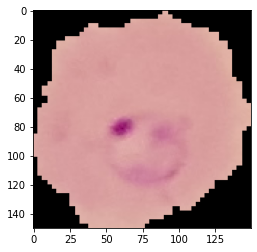

In [29]:
img1 = image.load_img(img1, target_size=(150, 150, 3))
plt.imshow(img1)
plt.show()

In [26]:
img2 = '/content/drive/MyDrive/kaggle_datasets/model-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'

In [22]:
predictions_names(img2)

Uninfected


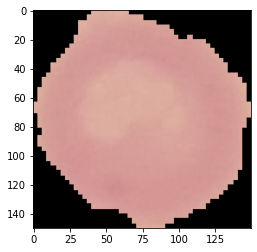

In [27]:
img2 = image.load_img(img2, target_size=(150, 150, 3))
plt.imshow(img2)
plt.show()